In [1]:
import pyvista as pv
import numpy as np
from PIL import Image

In [2]:
def faces_to_pyvista(faces):
    # converts faces array to pyvista type for visualization
    return np.hstack((np.full((faces.shape[0], 1), 3), faces))

# Poisson sampling

In [3]:
from mesh_poisson_disk_sampling import poisson_disk_sampling

In [4]:
# load an example mesh
mesh = pv.examples.download_bunny()

# convert to a vertices and faces array
vertices = np.array(mesh.points)
faces = mesh.faces.reshape((-1,4))[:,1:]

In [5]:
# this is not super efficient, it may take a while for large meshes
# based on your hardware, this can take up to 10 minutes

# points are sampled and saved as vertices of the mesh, so a new mesh with a list of indices is returned as output
vertices, faces, sampled_points = poisson_disk_sampling(vertices, faces, min_dist = None, points_to_sample = None, num_points = 1000, verbose = True)

Sampling about 1000 points with an estimated minimum distance of 0.00534456642344594
Number of points sampled in each disk: 30
Mesh is fine enough, with a coefficient of 0.2751515805721283
Starting sampling with vertex: 35947, with coordinates [-0.06347043  0.04224343  0.02749198]


Iteration 1113: : 1112it [05:33,  3.33it/s]                           


In [ ]:
mesh = pv.PolyData(vertices, faces_to_pyvista(faces))
plotter = pv.Plotter()
plotter.add_mesh(mesh, show_edges = False)
plotter.add_points(vertices[sampled_points], color = 'green', render_points_as_spheres = True)
plotter.show()

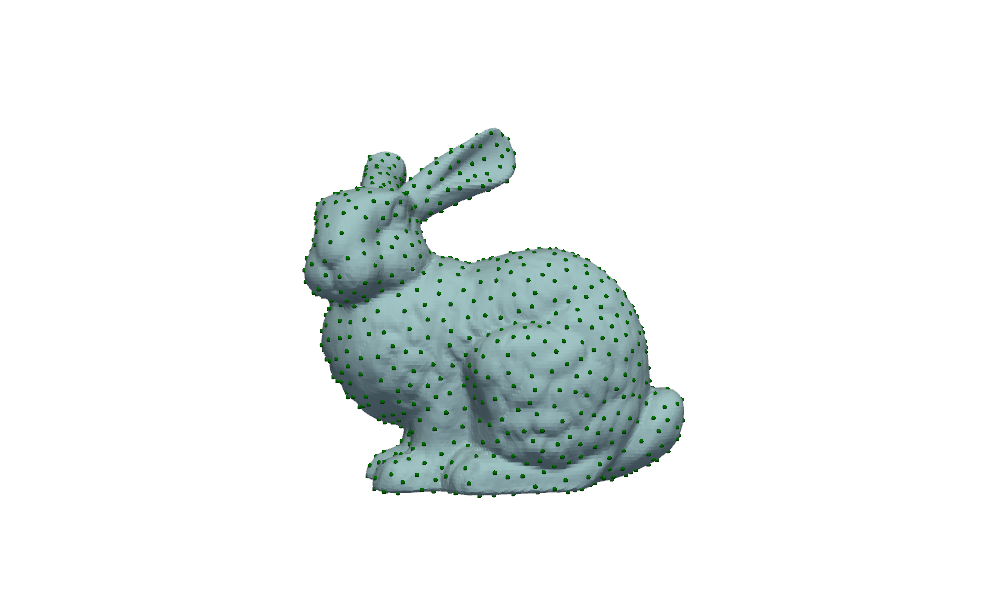

In [2]:
# this is what it looks like
Image.open('images/bunny_poisson.png')

# Uniform sampling

In [7]:
from mesh_poisson_disk_sampling import uniform_sampling

In [8]:
# load an example mesh
mesh = pv.examples.download_bunny()

# convert to a vertices and faces array
vertices = np.array(mesh.points)
faces = mesh.faces.reshape((-1,4))[:,1:]

In [9]:
# points are sampled and saved as vertices of the mesh, so a new mesh with a list of indices is returned as output
vertices, faces, sampled_points = uniform_sampling(vertices, faces, num_points = 1000)

In [ ]:
mesh = pv.PolyData(vertices, faces_to_pyvista(faces))
plotter = pv.Plotter()
plotter.add_mesh(mesh, show_edges = False)
plotter.add_points(vertices[sampled_points], color = 'green', render_points_as_spheres = True)
plotter.show()

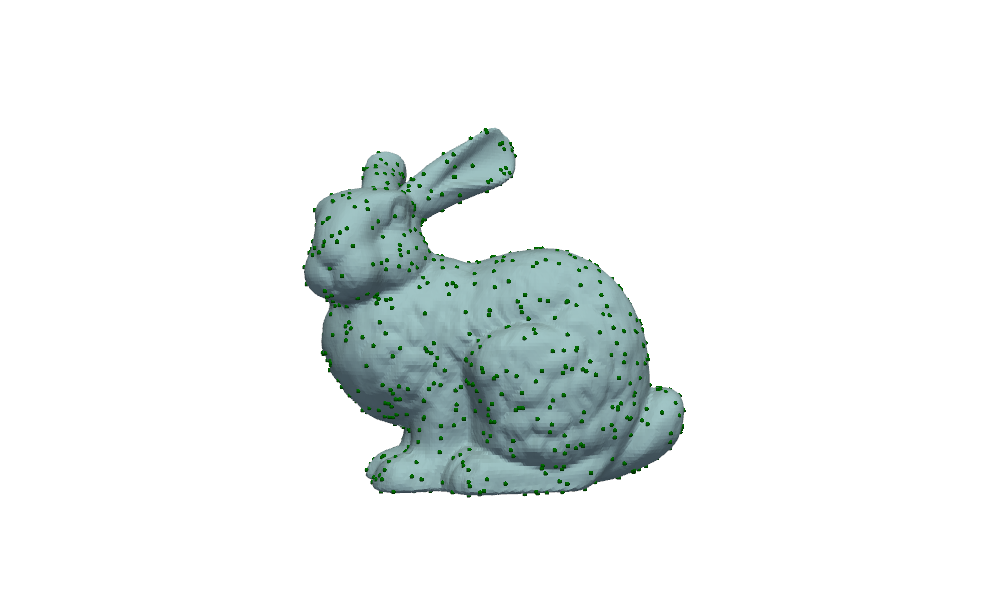

In [3]:
# this is what it looks like
Image.open('images/bunny_uniform.png')

# Poisson sampling with edge distance
If the mesh is fine enough, edge distance and geodesic distance are very similar

In [11]:
from mesh_poisson_disk_sampling import edge_distance_poisson_disk_sampling

In [12]:
# load an example mesh
mesh = pv.examples.download_bunny()

# convert to a vertices and faces array
vertices = np.array(mesh.points)
faces = mesh.faces.reshape((-1,4))[:,1:]

In [13]:
# this is not super efficient, it may take a while for large meshes
# based on your hardware, this can take up to 10 minutes

# points are sampled and saved as vertices of the mesh, so a new mesh with a list of indices is returned as output
vertices, faces, sampled_points = poisson_disk_sampling(vertices, faces, min_dist = None, points_to_sample = None, num_points = 1000, verbose = True)

Sampling about 1000 points with an estimated minimum distance of 0.00534456642344594
Number of points sampled in each disk: 30
Mesh is fine enough, with a coefficient of 0.2751515805721283
Starting sampling with vertex: 35947, with coordinates [-0.05892897  0.1155549  -0.01367677]


Iteration 1105: : 1104it [05:42,  3.22it/s]                           


In [ ]:
mesh = pv.PolyData(vertices, faces_to_pyvista(faces))
plotter = pv.Plotter()
plotter.add_mesh(mesh, show_edges = False)
plotter.add_points(vertices[sampled_points], color = 'green', render_points_as_spheres = True)
plotter.show()

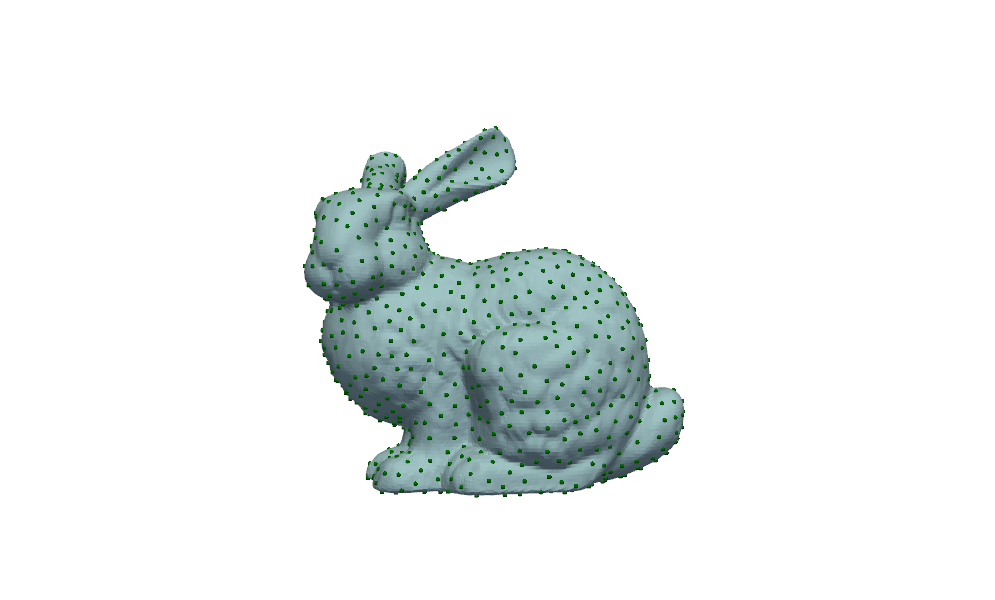

In [4]:
# this is what it looks like
Image.open('images/bunny_poisson_edgedist.png')